# Integrantes
**Juan José Aguado, Juan David Cruz, Mike Martínez y Juan Diego Ramírez**

# Libs

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge


# 1. Pregunta SMART y contexto


### **Introducción: Primera Pregunta SMART: Invalidación de la Pregunta de Investigación por Deficiencias en el Conjunto de Datos**

Inicialmente, el objetivo se articuló en torno a una pregunta de investigación formulada bajo el marco SMART. Dicha pregunta buscaba determinar la medida en que las variaciones anuales en indicadores clave —tales como la temperatura promedio, las emisiones de CO₂, el porcentaje de energía renovable y la cobertura forestal— podrían explicar la frecuencia de eventos climáticos extremos en un periodo definido (2000-2024), con el fin de proyectar su comportamiento futuro. La formulación de esta pregunta partía de la hipótesis de que existían relaciones subyacentes y cuantificables entre estas variables, fundamentadas en principios de la ciencia climática.

Como paso metodológico fundamental y previo a cualquier intento de modelado predictivo, se llevó a cabo un riguroso Análisis Exploratorio de Datos (EDA). Sin embargo, los hallazgos de esta fase analítica, detallados en el cuaderno de análisis [disponible aquí](https://www.google.com/search?q=https://github.com/1KVueltasAlCampo/analisis-de-datos-maestria-icesi/blob/main/Analisis_univariado_y_bivariado.ipynb), revelaron anomalías estadísticas insuperables que invalidan el conjunto de datos para el propósito planteado. Se identificó una **ausencia total de correlación lineal entre la totalidad de las variables**. De particular relevancia fue la inexistencia de una relación entre las emisiones de CO₂ y la temperatura promedio, una conclusión que contradice principios fundamentales y ampliamente documentados de la ciencia del clima.

Ante esta evidencia, se concluyó que el conjunto de datos inicial carecía de validez externa y no representaba la dinámica del sistema climático real. Por consiguiente, se determinó que la pregunta SMART original, aunque conceptualmente sólida, era irresoluble con la fuente de datos disponible, obligando a descartar su uso para evitar la generación de conclusiones espurias.

En respuesta a esta limitación, el proyecto se reorienta hacia un nuevo problema, fundamentado en un conjunto de datos validado que contiene registros climáticos mensuales desde mayo de 1983 hasta diciembre de 2008. Una inspección preliminar de esta nueva fuente de datos muestra un comportamiento consistente con la literatura científica, observándose tendencias temporales claras y correlaciones lógicas entre sus variables. El dataset integra mediciones de gases de efecto invernadero ($CO\_2$, $N\_2O$, $CH\_4$, CFCs), aerosoles estratosféricos, irradiancia solar total (TSI) y el índice oceánico-atmosférico MEI.

#### **Descripción del Problema**

El consenso científico, consolidado a través de décadas de investigación y articulado por entidades como el Panel Intergubernamental sobre el Cambio Climático (IPCC), establece de manera inequívoca que el sistema climático de la Tierra está experimentando un calentamiento antropogénico sin precedentes (Hansen et al., 2022). La base física de este fenómeno reside en el concepto de **forzamiento radiativo**, que describe la alteración del balance energético planetario debido a la acción de diversos agentes. Investigaciones fundamentales, como las recogidas en el informe del IPCC (Shine et al., 1990), demuestran que el principal impulsor de este calentamiento es el aumento sostenido en las concentraciones de gases de efecto invernadero (GEI) de larga vida, como el dióxido de carbono ($CO_2$), el metano ($CH_4$), el óxido nitroso ($N_2O$) y los clorofluorocarbonos (CFCs).

Sin embargo, la respuesta de la temperatura global no es una función lineal y exclusiva de los GEI. La dinámica climática es el resultado de una compleja interacción de múltiples factores que operan en distintas escalas temporales. A la tendencia de calentamiento a largo plazo inducida por los GEI se superponen otros forzamientos y ciclos de variabilidad interna. Entre ellos destacan:
1.  **Forzamientos negativos**, como los aerosoles estratosféricos, principalmente de origen volcánico, que reflejan la radiación solar y provocan enfriamientos temporales significativos (Shine et al., 1990).
2.  **Forzamientos naturales externos**, como las variaciones en la Irradiancia Solar Total (TSI), que, si bien tienen una magnitud menor en comparación con el forzamiento antropogénico reciente, contribuyen a la variabilidad climática.
3.  **Variabilidad interna del sistema climático**, cuyo modo dominante es la Oscilación del Sur de El Niño (ENSO), que explica una gran parte de las fluctuaciones de temperatura interanuales observadas (Hansen et al., 2022).

A pesar del robusto entendimiento de estos mecanismos individuales, el principal desafío científico y práctico reside en la **cuantificación de la contribución relativa y la interacción de estos agentes** para explicar la evolución observada de la temperatura global. Esta brecha de conocimiento no es meramente académica; tiene profundas implicaciones para la toma de decisiones. Como argumentan Lemos & Rood (2010), la percepción de una alta incertidumbre y complejidad es a menudo un obstáculo para la formulación de políticas efectivas, creando una parálisis decisional. La transición de un conocimiento científico "útil" (que describe el problema en términos generales) a uno "usable" (que puede informar estrategias de mitigación y adaptación) requiere de herramientas que puedan desglosar esta complejidad.

Tomando lo anterior en consideración, el alcance de este proyecto es desarrollar un modelo empírico basado en datos que permita **cuantificar la sensibilidad de la anomalía de la temperatura global a las variaciones en sus principales forzamientos y modos de variabilidad interna** durante el periodo 1983-2008. El objetivo es construir un marco analítico que no solo pueda explicar la dinámica histórica de la temperatura, sino también jerarquizar la importancia relativa de cada factor (GEI, aerosoles, TSI, ENSO), proveyendo así una herramienta más "usable" para contextualizar las causas del cambio climático y evaluar la efectividad potencial de distintas intervenciones.

#### **2. Justificación del Uso de Ciencia de Datos e IA**

El conjunto de datos `climate_change.csv` proporciona una serie temporal multivariada que encapsula las principales señales de forzamiento y la respuesta del sistema climático global. La tarea de cuantificar la relación entre estos factores y la anomalía de la temperatura (`Temp`) demanda un enfoque metodológico que pueda manejar la complejidad de las interacciones y las distintas escalas temporales presentes en los datos. La Ciencia de Datos y la Inteligencia Artificial (IA) ofrecen un marco analítico idóneo para este desafío, permitiendo una evaluación sistemática y comparativa de diferentes modelos para explicar la dinámica observada.

La aplicación de un conjunto diverso de técnicas de aprendizaje automático (Machine Learning) para la predicción de la temperatura está bien establecida en la literatura climatológica. Un estudio relevante de **Azari et al. (2022)** evaluó la eficacia de múltiples métodos de ML —desde modelos simples hasta ensambles— para la predicción de la temperatura, concluyendo que un marco comparativo es esencial para identificar el enfoque más adecuado. Dicho estudio subraya la validez de utilizar un espectro de modelos para capturar la naturaleza multifactorial de la temperatura atmosférica.

Siguiendo esta premisa, un primer paso metodológico clave es el uso de **modelos de regresión lineal múltiple**. Este enfoque se considera fundamental para establecer una línea de base cuantitativa robusta puesto que permite cuantificar las relaciones lineales primarias entre los predictores (concentraciones de GEI, TSI, aerosoles, MEI) y la temperatura, ofreciendo una alta interpretabilidad y una primera aproximación a la magnitud de la influencia de cada factor. La investigación de **Azari et al. (2022)** respalda la fortaleza de este método, ya que en su análisis comparativo, la Regresión Lineal demostró un rendimiento predictivo muy competitivo, solo superado por modelos más complejos.

Sin embargo, es ampliamente reconocido que el sistema climático contiene **dinámicas no lineales y efectos de interacción** que los modelos lineales no pueden capturar por completo. Por ejemplo, la relación entre las concentraciones de GEI y el forzamiento radiativo no es estrictamente lineal, y los efectos de los forzamientos pueden estar modulados por el estado del sistema (ej. fase de ENSO). Por ello, a futuro es imperativo explorar modelos de aprendizaje automático capaces de aprender estas complejidades. Métodos como los **ensambles de árboles de decisión (ej. Random Forest)** o las **Redes Neuronales Artificiales (ANN)** son particularmente aptos para esta tarea. El trabajo de **Azari et al. (2022)** nuevamente justifica este paso, al encontrar que una ANN fue el modelo que, en última instancia, logró la mayor precisión predictiva, sugiriendo la existencia de patrones no lineales valiosos que dicho modelo pudo identificar.

En conclusión, el uso de la Ciencia de Datos y la IA para este problema no se enfoca en la aplicación de un único algoritmo complejo, sino en la implementación de un **enfoque estratégico y comparativo**. Al comenzar con modelos lineales se puede mejorar ampliamente la interpretabilidad y establecer un rendimiento base, para luego explorar de manera sistemática modelos no lineales con el fin de capturar la complejidad adicional del sistema climático. 


#### **3. Formulación de una Pregunta SMART**

¿En qué medida es posible explicar la varianza de la anomalía de la temperatura global mensual entre mayo de 1983 y diciembre de 2008, y cuál es la magnitud, dirección y significancia estadística de la relación lineal entre esta y sus principales forzamientos (gases de efecto invernadero, aerosoles, irradiancia solar) y modos de variabilidad interna (ENSO)?

* **Específica (Specific):** La pregunta se enfoca de manera precisa en cuantificar la relación **lineal** entre un conjunto definido de variables predictoras (concentraciones de $CO_2$, $CH_4$, $N_2O$, CFCs, aerosoles, TSI y MEI) y una única variable objetivo (anomalía de la temperatura global). Delimita el análisis al marco de la regresión lineal múltiple, buscando determinar los coeficientes del modelo como medida de impacto.

* **Medible (Measurable):** El éxito del modelo se medirá a través de métricas estadísticas estándar y rigurosas. La capacidad explicativa global se evaluará con el **coeficiente de determinación (R²)**, con el objetivo de validar una capacidad predictiva considerable (superior a 0.70, en línea con los resultados preliminares). La magnitud y dirección de las relaciones se medirán directamente a través de los **coeficientes numéricos** obtenidos para cada predictor, y su robustez será evaluada por su **significancia estadística (valores p)**.

* **Accionable (Actionable):** Los resultados son directamente accionables al proveer una herramienta empírica para la toma de decisiones informadas. Los coeficientes del modelo cuantifican el cambio esperado en la temperatura por cada unidad de cambio en un forzamiento específico (ej. un aumento de 1 ppmv en $CO_2$). Esto transforma el modelo en un **simulador de escenarios simplificado**, permitiendo a los responsables de políticas públicas estimar y comparar el impacto relativo de la mitigación de diferentes gases, priorizando así las intervenciones sobre aquellos con mayor influencia lineal demostrada, como el $CO_2$ y el CFC-12.

* **Relevante (Relevant):** La pregunta es altamente relevante porque aborda directamente el desafío central expuesto en la Descripción del Problema: la **cuantificación de la contribución relativa** de los diversos agentes que impulsan el cambio climático. Al establecer una línea de base robusta y altamente interpretable, proporciona una respuesta empírica a una de las preguntas fundamentales de la climatología, traduciendo el conocimiento científico complejo en una herramienta analítica "usable" para el análisis de políticas, tal como lo demandan marcos conceptuales como el de Lemos & Rood (2010).

* **Temporal (Time-bound):** El alcance del análisis está estrictamente definido por el marco temporal del conjunto de datos disponible, abarcando el periodo histórico comprendido entre **mayo de 1983 y diciembre de 2008**. Todas las conclusiones y cuantificaciones se referirán a la dinámica observada dentro de este intervalo específico.


#### **Referencias:**

* **Hansen, J., Sato, M., & Ruedy, R. (2022).** *Global Temperature in 2021*. Columbia University Earth Institute. Recuperado de [https://www.columbia.edu/~mhs119/Temperature/Emails/Annual2021.pdf](https://www.columbia.edu/~mhs119/Temperature/Emails/Annual2021.pdf)
* **Lemos, M. C., & Rood, R. B. (2010).** Climate projections and their impact on policy and practice. *WIREs Climate Change*, 1(5), 670–682.
* **Shine, K. P., Derwent, R. G., Wuebbles, D. J., & Morcrette, J-J. (1990).** Radiative Forcing of Climate. En J. T. Houghton, G. J. Jenkins, & J. J. Ephraums (Eds.), *Climate Change: The IPCC Scientific Assessment* (pp. 41-68). Cambridge University Press.
* **Azari, B., Hassan, K., Pierce, J., & Ebrahimi, S. (2022).** Evaluation of Machine Learning Methods Application in Temperature Prediction. Computational Research Progress in Applied Science & Engineering, 8(1), 1–12. https://doi.org/10.52547/crpase.8.1.2747

Link al dataset: https://www.kaggle.com/datasets/econdata/climate-change

In [ ]:
df = pd.read_csv('climate_change.csv')
df

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


# 2. Análisis univariado para la variable **Temp**

## Introducción al problema

El cambio climático es uno de los mayores retos globales de este siglo. Numerosos estudios han documentado que la **temperatura media global** ha aumentado de manera sostenida durante las últimas décadas, generando consecuencias como el **aumento del nivel del mar**, la **pérdida de cobertura glaciar** y una **mayor frecuencia de fenómenos meteorológicos extremos**. Comprender cómo evoluciona la temperatura global y cuáles son los factores que influyen en ella resulta clave para anticipar riesgos y diseñar políticas ambientales eficaces.

El dataset *climate_change.csv* contiene registros mensuales desde **1983 hasta 2008** y busca analizar la relación entre la temperatura global y diversos factores atmosféricos y solares. Las variables incluidas son:

- **Year**: año de la observación.
- **Month**: mes de la observación.
- **Temp**: diferencia en grados Celsius entre la temperatura media global del periodo y un valor de referencia histórico.
- **CO2**: concentración de dióxido de carbono (en ppmv).
- **CH4**: concentración de metano (en ppmv).
- **N2O**: concentración de óxido nitroso (en ppmv).
- **CFC-11 y CFC-12**: concentraciones de clorofluorocarbonos (en ppbv).
- **TSI**: irradiancia solar total (W/m²).
- **Aerosols**: profundidad óptica media de aerosoles estratosféricos, asociada a erupciones volcánicas.
- **MEI**: índice multivariado ENSO (El Niño/Oscilación del Sur), indicador de fenómenos oceánicos que impactan el clima global.

## Variable seleccionada: Temp

Para este análisis se selecciona la variable **Temp**, que es importante ya que mide el cambio en la temperatura global respecto a un promedio de referencia. Esta variable es fundamental porque:

- Refleja directamente el **efecto del cambio climático** a lo largo del tiempo.
- Permite detectar **tendencias de calentamiento global**.
- Constituye la base para analizar el impacto de otras variables explicativas, como los gases de efecto invernadero, la irradiación solar o la actividad volcánica.

Esta variable puede influir en la toma de decisiones al ser capaces de analizar la tendencia en el tiempo y que acciones se pueden tomar para corregirla. Para un próximo análisis bivariado podemos ver también que otras variables influyen y como manejar mejor este problema.

In [ ]:
df.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


Se observa que la media de la variable *Temp* es positiva, lo que indica que, en promedio, la temperatura global durante el periodo analizado fue **superior al valor de referencia histórico**. En otras palabras, existe un incremento sostenido de la temperatura respecto al promedio base, lo que refleja una clara tendencia de calentamiento global.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


## Estadísticas descriptivas

In [ ]:
# Selección de la variable Temp
temp = df["Temp"].dropna()
# Estadísticas descriptivas
print("Media:", temp.mean())
print("Mediana:", temp.median())
print("Moda:", temp.mode()[0])
print("Desviación estándar:", temp.std())
print("\nResumen completo:\n", temp.describe())

# Identificación de outliers con IQR
Q1 = temp.quantile(0.25)
Q3 = temp.quantile(0.75)
IQR = Q3 - Q1
outliers = temp[(temp < Q1 - 1.5*IQR) | (temp > Q3 + 1.5*IQR)]
print("Cantidad de outliers detectados:", outliers.count())

Media: 0.25677597402597396
Mediana: 0.248
Moda: 0.266
Desviación estándar: 0.1790897682410269

Resumen completo:
 count    308.000000
mean       0.256776
std        0.179090
min       -0.282000
25%        0.121750
50%        0.248000
75%        0.407250
max        0.739000
Name: Temp, dtype: float64
Cantidad de outliers detectados: 0


## Visualización de la distribución

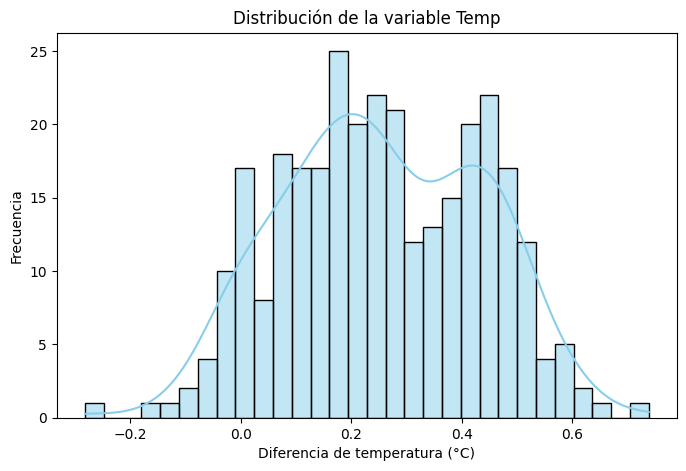

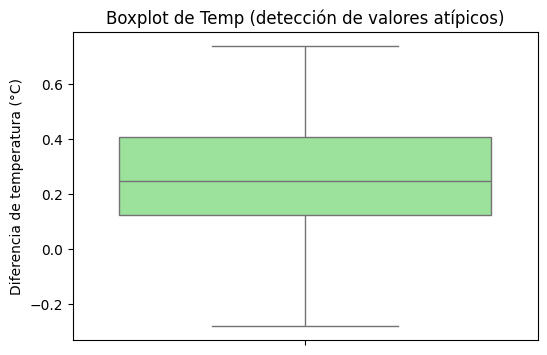

In [ ]:
# Histograma con KDE
plt.figure(figsize=(8,5))
sns.histplot(temp, kde=True, bins=30, color="skyblue")
plt.title("Distribución de la variable Temp")
plt.xlabel("Diferencia de temperatura (°C)")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot para visualizar outliers
plt.figure(figsize=(6,4))
sns.boxplot(y=temp, color="lightgreen")
plt.title("Boxplot de Temp (detección de valores atípicos)")
plt.ylabel("Diferencia de temperatura (°C)")
plt.show()


## Interpretación de resultados

Los resultados estadísticos muestran que la **media** de la variable *Temp* es **0.257 °C**, mientras que la **mediana** es **0.248 °C** y la **moda** es **0.266 °C**. La **desviación estándar** es relativamente baja (**0.179 °C**) ,en especial comparado con los extremos, lo que indica que la mayoría de los valores se concentran cerca del promedio.  

El histograma revela que la distribución de *Temp* se concentra entre **0.2 °C y ~0.4 °C**, con una ligera asimetría hacia la derecha, lo que refleja un **sesgo positivo**: existen más observaciones con valores por encima de la media que por debajo.  Esto también puede dar pistas del constante y creciente aumento de la temperatura a lo largo de los años.

El boxplot confirma que **no se detectaron valores atípicos** mediante el criterio de rango intercuartílico (IQR). Esto significa que los cambios en la temperatura se comportan de manera relativamente estable dentro del rango observado, sin anomalías extremas.  

En conjunto, este análisis sugiere que durante el período **1983–2008** la temperatura global presentó una **diferencia positiva sostenida respecto al valor de referencia histórico**, lo que constituye una clara señal de **calentamiento global progresivo**.


## Conclusiones

El análisis univariado realizado sobre la variable *Temp* permite confirmar que, en el periodo comprendido entre **1983 y 2008**, la temperatura global presentó un **incremento sostenido respecto al valor de referencia histórico**. La media positiva, junto con la ausencia de valores atípicos significativos y la ligera asimetría hacia la derecha, refuerzan la evidencia de un **proceso de calentamiento progresivo**.

No obstante, este tipo de análisis tiene limitaciones. Si bien es fundamental como primer paso para comprender el comportamiento general de la variable, por sí solo **no es suficiente para identificar tendencias temporales ni para explicar la influencia de factores externos**. Para un estudio más profundo es necesario **contrastar la temperatura con otras variables** del conjunto de datos, como el año, las concentraciones de gases de efecto invernadero (CO₂, CH₄, N₂O) o el índice ENSO (MEI), lo que permitiría explorar **relaciones causales y patrones multivariados**.

En síntesis, el análisis univariado ofrece una visión clara de la distribución de la temperatura global y confirma su incremento en el periodo observado, pero debe complementarse con análisis multivariados para obtener conclusiones más robustas sobre las **causas y dinámicas del cambio climático**.


# 3. Análisis bivariado para las variables **Temp** y CO2

##  Análisis y visualizaciones en Python

Correlación de Pearson entre Temp y CO2: 0.7485046457380213


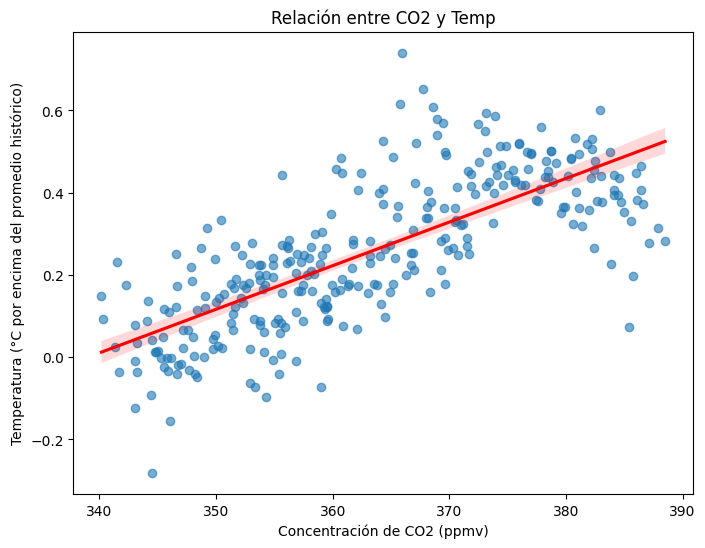

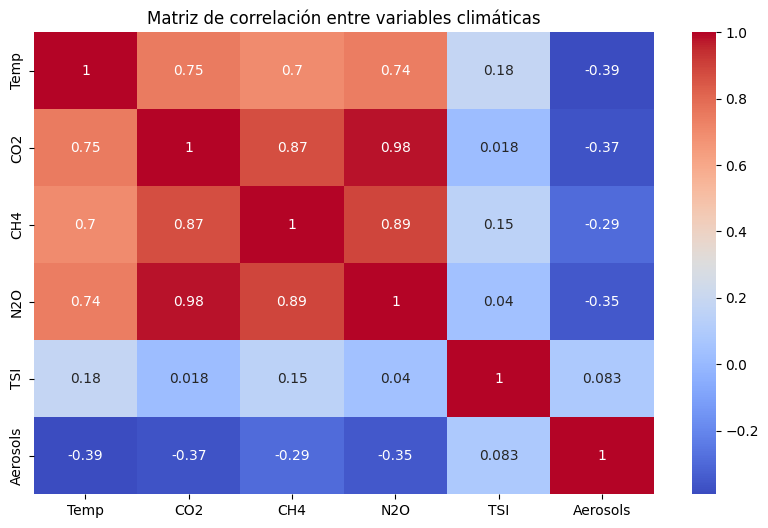

In [ ]:
# Correlación entre Temp y CO2
corr = df["Temp"].corr(df["CO2"])
print("Correlación de Pearson entre Temp y CO2:", corr)

# Gráfico de dispersión con línea de tendencia
plt.figure(figsize=(8,6))
sns.regplot(x="CO2", y="Temp", data=df, scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Relación entre CO2 y Temp")
plt.xlabel("Concentración de CO2 (ppmv)")
plt.ylabel("Temperatura (°C por encima del promedio histórico)")
plt.show()

# Heatmap de correlación entre múltiples variables numéricas
plt.figure(figsize=(10,6))
sns.heatmap(df[["Temp","CO2","CH4","N2O","TSI","Aerosols"]].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre variables climáticas")
plt.show()

El análisis del heatmap de correlación y del diagrama de dispersión evidencia que **CO₂ mantiene una relación positiva fuerte con la variable Temp**. No obstante, la asociación no parece ser estrictamente lineal, especialmente en los valores más altos de CO₂, donde la pendiente del gráfico se atenúa. Para confirmar esta tendencia y evaluar una posible relación monótona no lineal, resulta pertinente calcular también el **coeficiente de correlación de Spearman**.


In [ ]:
# Correlación de Pearson
pearson_corr, p_value_pearson = stats.pearsonr(df["CO2"], df["Temp"])
print("Coeficiente de Pearson:", pearson_corr)
print("Valor p (Pearson):", p_value_pearson)

# Correlación de Spearman (no lineal)
spearman_corr, p_value_spearman = stats.spearmanr(df["CO2"], df["Temp"])
print("Coeficiente de Spearman:", spearman_corr)
print("Valor p (Spearman):", p_value_spearman)

Coeficiente de Pearson: 0.7485046457380209
Valor p (Pearson): 1.5578804156204734e-56
Coeficiente de Spearman: 0.7767509604626791
Valor p (Spearman): 2.1144272950582172e-63


El **coeficiente de Pearson** obtenido fue **0.749** con un valor *p* de **1.55e-56**. Esto indica una **correlación lineal positiva fuerte** entre la concentración de CO₂ y la variable *Temp*, y la significancia estadística es muy alta (p < 0.05), por lo que se descarta que la relación sea producto del azar.

El **coeficiente de Spearman** fue **0.777** con un valor *p* de **2.11e-63**, lo cual también refleja una **correlación positiva fuerte**, pero en este caso de tipo **monótona**. Esto confirma que, aunque la relación no sea perfectamente lineal en todos los rangos de CO₂, la temperatura tiende a aumentar consistentemente conforme lo hacen los niveles de CO₂.

En conjunto, ambos resultados respaldan la conclusión de que **el incremento de CO₂ está estrechamente asociado con el aumento de la temperatura global** en el período analizado (1983–2008).


/tmp/ipython-input-1627820669.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CO2_categoria", y="Temp", data=df, palette="Set2")


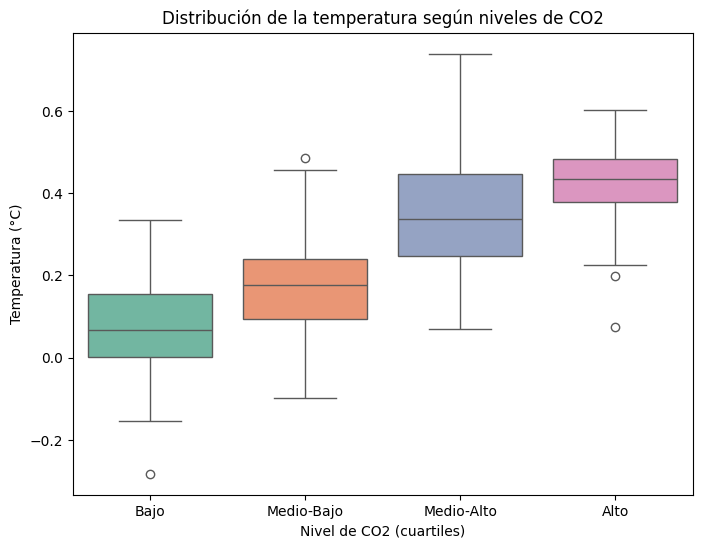

In [ ]:
# Crear categorías de CO2 por cuartiles
df["CO2_categoria"] = pd.qcut(df["CO2"], q=4, labels=["Bajo","Medio-Bajo","Medio-Alto","Alto"])

plt.figure(figsize=(8,6))
sns.boxplot(x="CO2_categoria", y="Temp", data=df, palette="Set2")
plt.title("Distribución de la temperatura según niveles de CO2")
plt.xlabel("Nivel de CO2 (cuartiles)")
plt.ylabel("Temperatura (°C)")
plt.show()

El **boxplot de temperatura según niveles de CO₂** muestra un desplazamiento progresivo de la mediana hacia valores más altos conforme aumentan las concentraciones de CO₂. En el grupo **“Bajo”**, la mediana se ubica cerca de 0 °C, mientras que en el grupo **“Alto”** supera los 0.4 °C. Además, la dispersión de valores es mayor en las categorías intermedias, lo que indica una mayor variabilidad de la temperatura en estos rangos. La presencia de algunos outliers refleja episodios puntuales de temperaturas extremas, pero no modifica la tendencia general.

/tmp/ipython-input-2535798005.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="CO2_categoria", y="Temp", data=df, estimator=np.mean, ci=None, palette="muted")
/tmp/ipython-input-2535798005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CO2_categoria", y="Temp", data=df, estimator=np.mean, ci=None, palette="muted")


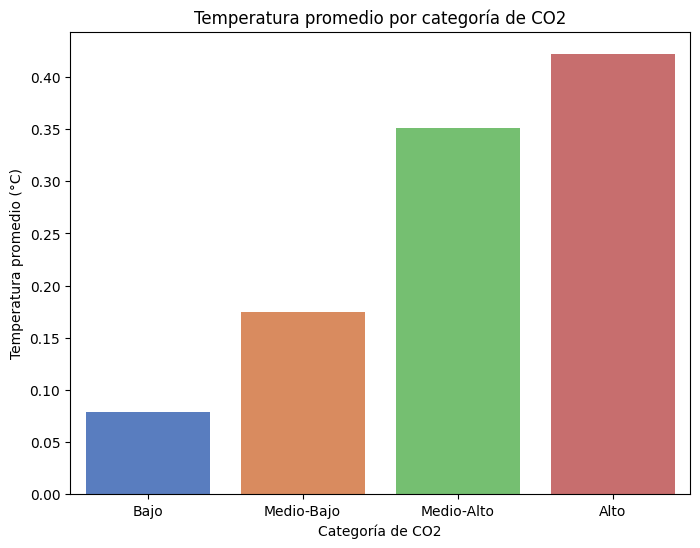

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x="CO2_categoria", y="Temp", data=df, estimator=np.mean, ci=None, palette="muted")
plt.title("Temperatura promedio por categoría de CO2")
plt.xlabel("Categoría de CO2")
plt.ylabel("Temperatura promedio (°C)")
plt.show()

El **gráfico de barras de temperatura promedio por categoría de CO₂** confirma esta relación, evidenciando un incremento sistemático de la temperatura promedio: desde aproximadamente **0.08 °C en el grupo “Bajo”** hasta más de **0.42 °C en el grupo “Alto”**. La progresión es prácticamente lineal, lo que refuerza la idea de un vínculo estrecho entre el aumento del CO₂ y el calentamiento global.

En conjunto, ambos gráficos coinciden en señalar que **mayores concentraciones de CO₂ se asocian con incrementos sostenidos en la temperatura global**. Estos resultados respaldan la hipótesis de que los gases de efecto invernadero desempeñan un papel determinante en el cambio climático.


## Conclusiones

El análisis bivariado entre la concentración de **CO₂** y la variable **Temp** permitió identificar una **correlación positiva fuerte y estadísticamente significativa**. Tanto el coeficiente de Pearson (0.75) como el de Spearman (0.78) confirmaron que, a medida que aumentan las concentraciones de CO₂ en la atmósfera, la temperatura global tiende a incrementarse de manera consistente.  

Las visualizaciones refuerzan este hallazgo: el diagrama de dispersión mostró una tendencia creciente, mientras que los boxplots y el gráfico de barras evidenciaron un aumento sistemático de la temperatura al pasar de niveles bajos a altos de CO₂. El heatmap, por su parte, reveló que otros gases de efecto invernadero como CH₄ y N₂O también mantienen relaciones positivas con la temperatura, lo que sugiere un patrón multivariable en la dinámica del calentamiento global.  

En el contexto del conjunto de datos, esta relación respalda la hipótesis científica de que las emisiones de gases de efecto invernadero son un factor determinante en el cambio climático. Como próximos pasos, sería pertinente realizar un **análisis multivariado** que incluya otras variables (CH₄, N₂O, aerosoles, TSI) y evaluar modelos predictivos que permitan cuantificar la contribución relativa de cada uno de estos factores al incremento de la temperatura global aplicando métodos de regularización como Ridge para reducir el impacto de las variables que no sean significativas para los modelos o que tengan colinealidad con otras..


# 4. Preparación de datos

La preparación de los datos se ejecuta de la siguiente manera. Se separan las variables en dos grupos: las variables predictoras y la variable objetivo (y), que es la Temp. Se dividen los datos en un conjunto de entrenamiento y un conjunto de prueba. A continuación se estandarizan los datos para evitar los problemas generados por las diferencias en las magnitudes con las que se mide cada variable.


In [ ]:
#1. Separar las variables predictoras (X) y la variable objetivo (y) descartando las variables categoricas o de fecha
X = df.drop(columns=['Temp', 'CO2_categoria', 'Year', 'Month'])
y = df['Temp']

In [ ]:
# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 3. Escalar las características
# Creamos una instancia del escalador
scaler = StandardScaler()

# Ajustamos el escalador con solo los datos de entrenamiento y los transformamos
X_train_scaled = scaler.fit_transform(X_train)

# Usamos el escalador ajustado para transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)

# 5.(EXTRA) Ajuste de modelo de regresión

Se plantea un modelo de regresión lineal para cuantificar la relación entre los factores climáticos y la temperatura global. Se utiliza un modelo de Regresión Lineal Múltiple.



In [ ]:
# 1. Crear y entrenar el modelo de Regresión Lineal
# Creamos una instancia del modelo
model = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento escalados
model.fit(X_train_scaled, y_train)

# 2. Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# 3. Evaluar el rendimiento del modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # El Root Mean Squared Error es más interpretable

print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")

# 4. Analizar los coeficientes del modelo
# Esto nos dice qué tan importante es cada variable para el modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes del modelo:")
print(coefficients)

Coeficiente de Determinación (R²): 0.6979
Error Cuadrático Medio (MSE): 0.0098
Raíz del Error Cuadrático Medio (RMSE): 0.0988

Coeficientes del modelo:
          Coeficiente
MEI          0.057034
CO2          0.062800
CH4          0.005305
N2O         -0.085663
CFC-11      -0.144856
CFC-12       0.246758
TSI          0.032722
Aerosols    -0.042688


**Coeficiente de Determinación (R²):** las variables predictoras que seleccionamos explican aproximadamente el 69.8% de la variabilidad en la temperatura (Temp) con los datos usados.

**Raíz del Error Cuadrático Medio (RMSE):** En promedio, las predicciones del modelo se desvían unos 0.099 °C del valor real de la temperatura. Considerando que los valores de Temp van desde -0.28 a 0.74, es un error bastante bajo.

**Coeficientes del modelo:**

**Valores positivos (como CFC-12, CO2 y MEI)** indican que un aumento en estas variables se asocia con un aumento en la Temp. Destaca CFC-12 con el coeficiente positivo más alto.

**Valores negativos (como CFC-11 y N2O)** sugieren que, según el modelo, un aumento en estas variables se asocia con una disminución en la Temp, un resultado interesante que podría explorarse más a fondo, ya que contradice la hipótesis inicial para el N2O. Esto podría deberse a la multicolinealidad (correlaciones entre las propias variables predictoras).


A continuación se aplicará la regularización de Ridge para evaluar la verdadera relevancia de cada una de las variables predictoras para explicar los cambios en la temperatura

In [ ]:
# Continuamos con los datos ya preparados (X_train_scaled, X_test_scaled, y_train, y_test)
# y el modelo de regresión lineal anterior ('model') para comparar.

# 1. Crear y entrenar el modelo de Regresión Ridge
# Usamos el valor por defecto de alpha=1.0, que es un buen punto de partida para la regularización.
ridge_model = Ridge(alpha=1.0)

# Entrenamos el modelo Ridge con los mismos datos de entrenamiento
ridge_model.fit(X_train_scaled, y_train)

# 2. Realizar predicciones con el modelo Ridge
y_pred_ridge = ridge_model.predict(X_test_scaled)

# 3. Evaluar el rendimiento del modelo Ridge
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("--- Resultados del Modelo Ridge ---")
print(f"Coeficiente de Determinación (R²): {r2_ridge:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse_ridge:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_ridge:.4f}")

# 4. Comparar los coeficientes de ambos modelos
ridge_coefficients = pd.DataFrame(ridge_model.coef_, X.columns, columns=['Coeficiente_Ridge'])
coefficients['Coeficiente_Ridge'] = ridge_coefficients['Coeficiente_Ridge']
coefficients.rename(columns={'Coeficiente': 'Coeficiente_Lineal'}, inplace=True)

print("\n--- Comparación de Coeficientes ---")
print(coefficients)

--- Resultados del Modelo Ridge ---
Coeficiente de Determinación (R²): 0.6936
Error Cuadrático Medio (MSE): 0.0099
Raíz del Error Cuadrático Medio (RMSE): 0.0995

--- Comparación de Coeficientes ---
          Coeficiente_Lineal  Coeficiente_Ridge
MEI                 0.057034           0.057898
CO2                 0.062800           0.057013
CH4                 0.005305           0.008139
N2O                -0.085663          -0.029970
CFC-11             -0.144856          -0.094238
CFC-12              0.246758           0.159317
TSI                 0.032722           0.032270
Aerosols           -0.042688          -0.044005


###Resultados modelo

El R² del modelo Ridge (0.6936) es casi idéntico al de la regresión lineal (0.6979). Para el caso de  las variables CFC-12 y CFC-11, el modelo lineal les dio coeficientes muy grandes (0.247 y -0.145). Ridge los ha reducito significativamente (a 0.159 y -0.094). Esto sugiere que la alta correlación entre ellos y otros predictores podría haber "inflado" su importancia en el primer modelo.

MEI y CO2 mantienen coeficientes positivos y relativamente estables, El coeficiente de N2O pasó de ser fuertemente negativo (-0.085663) a ser mucho más cercano a cero (-0.029970). Ridge sugiere que la influencia negativa de esta variable probablemente se debía a la multicolinealidad, y no es un predictor tan fuerte como parecía.

### Conclusiones Modelo

El modelo de regresión lineal múltiple con regularización Ridge ejecutado ofrece una visión respaldada de las variables que más afectan la temperatura global. Su principal utilidad radica en la capacidad de ir más allá de la simple correlación para estimar la magnitud del impacto de cada predictor mediante el análisis de sus coeficientes. El análisis identificó a los gases de efecto invernadero, específicamente CO2 y CFC-12, como las variables con la influencia positiva más significativa y estadísticamente robusta. En cuanto a la predicción, el modelo demostró una capacidad considerable con un R² ≈ 0.70.

La utilidad predictiva del modelo es la base para abordar la "prevención", entendida como la mitigación informada de los factores de riesgo. El modelo funciona como un simulador de escenarios simplificado: permite evaluar el impacto potencial de diferentes políticas de emisión. Por ejemplo, se puede proyectar cómo cambiaría la predicción de la temperatura si se redujeran las concentraciones de CO2 o CFC-12 en un porcentaje determinado. Este enfoque basado en datos es fundamental para una toma de decisiones informada, ya que permite a los responsables de políticas públicas priorizar las intervenciones sobre los gases con mayor impacto. Por lo tanto, el modelo no solo responde "qué" variables son importantes, sino que también proporciona una herramienta para evaluar "cómo" las acciones sobre estas variables podrían mitigar el calentamiento futuro.